## data collection

In [1]:
def readTextFile(path):
    with open(path) as f:
        captions=f.read()
    return captions

In [2]:
captions= readTextFile("./Flickr_Data/Flickr_TextData/Flickr8k.token.txt")

In [3]:
captions=captions.split('\n')[:-1]  ## becoz captions[-1] i.e. last line is empty

In [4]:
captions[0]  ## gives you image id and captions id and captions

'1000268201_693b08cb0e.jpg#0\tA child in a pink dress is climbing up a set of stairs in an entry way .'

In [5]:
len(captions)

40460

In [6]:
captions[0:10]

['1000268201_693b08cb0e.jpg#0\tA child in a pink dress is climbing up a set of stairs in an entry way .',
 '1000268201_693b08cb0e.jpg#1\tA girl going into a wooden building .',
 '1000268201_693b08cb0e.jpg#2\tA little girl climbing into a wooden playhouse .',
 '1000268201_693b08cb0e.jpg#3\tA little girl climbing the stairs to her playhouse .',
 '1000268201_693b08cb0e.jpg#4\tA little girl in a pink dress going into a wooden cabin .',
 '1001773457_577c3a7d70.jpg#0\tA black dog and a spotted dog are fighting',
 '1001773457_577c3a7d70.jpg#1\tA black dog and a tri-colored dog playing with each other on the road .',
 '1001773457_577c3a7d70.jpg#2\tA black dog and a white dog with brown spots are staring at each other in the street .',
 '1001773457_577c3a7d70.jpg#3\tTwo dogs of different breeds looking at each other on the road .',
 '1001773457_577c3a7d70.jpg#4\tTwo dogs on pavement moving toward each other .']

In [7]:
captions[0].split("\t")

['1000268201_693b08cb0e.jpg#0',
 'A child in a pink dress is climbing up a set of stairs in an entry way .']

In [8]:
captions[0].split("\t")[0].split(".")

['1000268201_693b08cb0e', 'jpg#0']

In [9]:
# Dictionary to Map each Image with the list of captions it has

descriptions={}

for x in captions:
    first,second=x.split("\t")
    img_name= first.split(".")[0]
    
    if descriptions.get(img_name) is None:
        descriptions[img_name]=[]
        
    descriptions[img_name].append(second)
    

In [10]:
descriptions['1000268201_693b08cb0e']

['A child in a pink dress is climbing up a set of stairs in an entry way .',
 'A girl going into a wooden building .',
 'A little girl climbing into a wooden playhouse .',
 'A little girl climbing the stairs to her playhouse .',
 'A little girl in a pink dress going into a wooden cabin .']

# data visualization

In [11]:
import cv2
import matplotlib.pyplot as plt


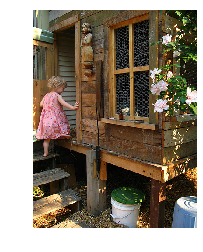

Discription is : 


['A child in a pink dress is climbing up a set of stairs in an entry way .',
 'A girl going into a wooden building .',
 'A little girl climbing into a wooden playhouse .',
 'A little girl climbing the stairs to her playhouse .',
 'A little girl in a pink dress going into a wooden cabin .']

In [12]:
IMG_PATH = "Flickr_Data/Images/"


img = cv2.imread(IMG_PATH+"1000268201_693b08cb0e.jpg")

img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.axis("off")
plt.show()
print("Discription is : ")

descriptions['1000268201_693b08cb0e']    ## just a training sample



# Data Cleaning
- we will not remove any stopwords becoz if we do so then correct english will not generate
- we will remove all numbers ,punctuation and we will convert all captions in lower case
- this will make our vocab size small
- less vocab size => less overfitting,less computation 


In [13]:
import re

In [14]:
def clean_text(sentence):
    sentence = sentence.lower()
    sentence = re.sub("[^a-z]+"," ",sentence)
    sentence = sentence.split()
    
    sentence  = [s for s in sentence if len(s)>1]
    sentence = " ".join(sentence)
    return sentence

In [15]:
clean_text("A cat is sitting over the house # 64")

'cat is sitting over the house'

In [16]:
# Clean all Captions
for key,caption_list in descriptions.items():
    for i in range(len(caption_list)):
        caption_list[i] = clean_text(caption_list[i])

In [17]:
descriptions["1000268201_693b08cb0e"]

['child in pink dress is climbing up set of stairs in an entry way',
 'girl going into wooden building',
 'little girl climbing into wooden playhouse',
 'little girl climbing the stairs to her playhouse',
 'little girl in pink dress going into wooden cabin']

In [18]:
# Write the data to text file
with open("descriptions_1.txt","w") as f:
    f.write(str(descriptions))
## this step is done so that we can save our preprocessing results in a text file

In [19]:
 type(descriptions)

dict

## Vocabulary   -------------- 

In [20]:
import json

In [21]:
descriptions = None
with open("descriptions_1.txt",'r') as f:
    descriptions= f.read()

print(type(descriptions))

<class 'str'>


In [22]:
## but we want it in dictionary form

In [23]:
json_acceptable_string = descriptions.replace("'","\"") 
descriptions = json.loads(json_acceptable_string)  # json is a dictionary only
print(type(descriptions))

<class 'dict'>


In [24]:
## sets-example

vocab=set()
vocab.update(["hi","hi","hello"])
vocab   ## contains only unique words


{'hello', 'hi'}

In [25]:
## vocab of all unique words in captions

In [26]:
vocab = set()
for key in descriptions.keys():
    [vocab.update(sentence.split()) for sentence in descriptions[key]] # list comprehension
    
print("Vocab Size of unique words : %d"% len(vocab))

Vocab Size of unique words : 8424


In [27]:
#vocab

In [28]:
# Total No of words across all the sentences
total_words = []

for key in descriptions.keys():
    [total_words.append(i) for des in descriptions[key] for i in des.split()]
    
print("Total Words %d"%len(total_words))

Total Words 373837


- so total number of words are 373837 and in which 8424 words are unique
- and we will remove those words having frequency less than a threshold frequency


In [29]:
#  Filter Words from the Vocab according to certain threshold frequncy

In [30]:
total_words[0:10]

['child', 'in', 'pink', 'dress', 'is', 'climbing', 'up', 'set', 'of', 'stairs']

In [31]:
import collections

counter = collections.Counter(total_words) ## basically count the frequency of words
freq_cnt = dict(counter)


In [32]:
print(freq_cnt['child'])

1545


In [33]:
print(len(freq_cnt.keys())) ## total unique words

8424


In [34]:
# Sort this dictionary according to the freq count
# sorting based upon counts/frequency
sorted_freq_cnt = sorted(freq_cnt.items(),reverse=True,key=lambda x:x[1])  
#sorted_freq_cnt

In [35]:
# Filter
threshold = 10
sorted_freq_cnt  = [x for x in sorted_freq_cnt if x[1]>threshold]
sorted_freq_cnt

[('in', 18987),
 ('the', 18420),
 ('on', 10746),
 ('is', 9345),
 ('and', 8863),
 ('dog', 8138),
 ('with', 7765),
 ('man', 7275),
 ('of', 6723),
 ('two', 5643),
 ('white', 3959),
 ('black', 3848),
 ('boy', 3581),
 ('are', 3505),
 ('woman', 3403),
 ('girl', 3328),
 ('to', 3176),
 ('wearing', 3062),
 ('at', 2916),
 ('people', 2887),
 ('water', 2790),
 ('red', 2691),
 ('young', 2630),
 ('brown', 2578),
 ('an', 2432),
 ('his', 2357),
 ('blue', 2279),
 ('dogs', 2125),
 ('running', 2073),
 ('through', 2032),
 ('playing', 2008),
 ('while', 1968),
 ('shirt', 1962),
 ('down', 1843),
 ('standing', 1789),
 ('ball', 1783),
 ('little', 1768),
 ('grass', 1622),
 ('snow', 1547),
 ('child', 1545),
 ('person', 1542),
 ('jumping', 1473),
 ('over', 1415),
 ('three', 1389),
 ('front', 1386),
 ('sitting', 1368),
 ('holding', 1324),
 ('up', 1302),
 ('field', 1283),
 ('small', 1278),
 ('by', 1249),
 ('large', 1237),
 ('green', 1234),
 ('one', 1223),
 ('group', 1218),
 ('yellow', 1217),
 ('her', 1178),
 ('walk

In [36]:
total_words = [x[0] for x in sorted_freq_cnt]


In [37]:
print(len(total_words))  

1845


- so we starts from 3.7lakh words in which 8424 words are unique and we remove all words having frequency less than threshold value and we comes up at 1845 words
- so our final vocab size is 1845 


In [38]:
print(total_words[:200])

['in', 'the', 'on', 'is', 'and', 'dog', 'with', 'man', 'of', 'two', 'white', 'black', 'boy', 'are', 'woman', 'girl', 'to', 'wearing', 'at', 'people', 'water', 'red', 'young', 'brown', 'an', 'his', 'blue', 'dogs', 'running', 'through', 'playing', 'while', 'shirt', 'down', 'standing', 'ball', 'little', 'grass', 'snow', 'child', 'person', 'jumping', 'over', 'three', 'front', 'sitting', 'holding', 'up', 'field', 'small', 'by', 'large', 'green', 'one', 'group', 'yellow', 'her', 'walking', 'children', 'men', 'into', 'air', 'beach', 'near', 'mouth', 'jumps', 'another', 'for', 'street', 'runs', 'its', 'from', 'riding', 'stands', 'as', 'bike', 'girls', 'outside', 'other', 'off', 'out', 'rock', 'next', 'play', 'orange', 'looking', 'pink', 'player', 'camera', 'their', 'pool', 'hat', 'jacket', 'boys', 'women', 'around', 'behind', 'some', 'background', 'dirt', 'toy', 'soccer', 'sits', 'dressed', 'has', 'wall', 'mountain', 'walks', 'crowd', 'along', 'plays', 'stand', 'looks', 'building', 'park', 'cl

## Prepare Train/Test Data

In [39]:
train_file_data = readTextFile("Flickr_Data/Flickr_TextData/Flickr_8k.trainImages.txt")
test_file_data = readTextFile("Flickr_Data/Flickr_TextData/Flickr_8k.testImages.txt")

In [40]:
#print(train_file_data)

In [41]:
train = [row.split(".")[0] for row in train_file_data.split("\n")[:-1]]
test = [row.split(".")[0] for row in test_file_data.split("\n")[:-1]]  ## -1 because last line is empty

In [42]:
train[:5]

['2513260012_03d33305cf',
 '2903617548_d3e38d7f88',
 '3338291921_fe7ae0c8f8',
 '488416045_1c6d903fe0',
 '2644326817_8f45080b87']

In [43]:
test[:5]

['3385593926_d3e9c21170',
 '2677656448_6b7e7702af',
 '311146855_0b65fdb169',
 '1258913059_07c613f7ff',
 '241347760_d44c8d3a01']

In [44]:
# Prepare Description for the Training Data
# Tweak - Add <s> and <e> token to our training data

In [45]:
train_descriptions = {}

for img_id in train:
    train_descriptions[img_id] = []
    for cap in descriptions[img_id]:
        cap_to_append = "startseq "  + cap + " endseq"
        train_descriptions[img_id].append(cap_to_append)

In [46]:
train_descriptions['3338291921_fe7ae0c8f8']

['startseq brown dog in the snow has something hot pink in its mouth endseq',
 'startseq brown dog in the snow holding pink hat endseq',
 'startseq brown dog is holding pink shirt in the snow endseq',
 'startseq dog is carrying something pink in its mouth while walking through the snow endseq',
 'startseq dog with something pink in its mouth is looking forward endseq']

In [47]:
train_descriptions["1000268201_693b08cb0e"]  
## we addded tokens in each caption so that our lstm model can know where 
##to start and where to end

['startseq child in pink dress is climbing up set of stairs in an entry way endseq',
 'startseq girl going into wooden building endseq',
 'startseq little girl climbing into wooden playhouse endseq',
 'startseq little girl climbing the stairs to her playhouse endseq',
 'startseq little girl in pink dress going into wooden cabin endseq']

## Transfer Learning
- Images --> Features ## we will use pretrained model(resnet 50) to extract features
- Text ---> Features 
- we will use transfer learning to convert images into features and text into features


In [48]:
from keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions


Using TensorFlow backend.


In [49]:
model = ResNet50(weights="imagenet",input_shape=(224,224,3))
model.summary()

W1109 11:34:47.141317 14048 deprecation_wrapper.py:119] From C:\Users\Sahil Garg\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1109 11:34:47.154343 14048 deprecation_wrapper.py:119] From C:\Users\Sahil Garg\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1109 11:34:47.158972 14048 deprecation_wrapper.py:119] From C:\Users\Sahil Garg\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4185: The name tf.truncated_normal is deprecated. Please use tf.random.truncated_normal instead.

W1109 11:34:47.178810 14048 deprecation_wrapper.py:119] From C:\Users\Sahil Garg\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W1109 11:34:47.179811 140

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation

In [50]:
model.layers[-1]  ## gives the layer name

## we want to use above model upto global average pooling layer which is model.layers[-2]

In [51]:
from keras.models import Model, load_model


In [52]:
model.layers[-2].output

<tf.Tensor 'avg_pool/Mean:0' shape=(?, 2048) dtype=float32>

In [53]:
model_new = Model(model.input,model.layers[-2].output)  ## functional API

#### model_new is resnet 50 conv base
#### if we pass m images to model_new then we will get m x 2048 as output feature
#### so we will extracts all the features vector now and store them in  a file so that we dont need to compute it again and again

In [54]:
from keras.preprocessing import image
import numpy as np

In [55]:
def preprocess_img(img):
    img = image.load_img(img,target_size=(224,224))
    img = image.img_to_array(img)
    #print(img.shape)
    img = np.expand_dims(img,axis=0) ## it will basically expand our image in one more dimension
    ## resnet 50 accepts a 4d tensor ..... ## np.expend_dims is a basically  reshape operation
    # Normalisation
    img = preprocess_input(img)   ## resnet 50 accepts such kind of preprocessing
    return img

W1109 11:34:54.058268 14048 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


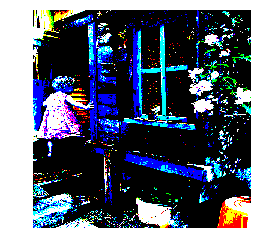

In [56]:
img = preprocess_img(IMG_PATH+"1000268201_693b08cb0e.jpg")
plt.imshow(img[0])
plt.axis("off")
plt.show()
## this image will be fit to the resnet

## now image preprocessing for all the training set

In [57]:
## we will pass  image -->> preprocess image  -->> resnet50 conv base  -->> return features 
def encode_image(img):
    img = preprocess_img(img)
    feature_vector = model_new.predict(img)
    
    feature_vector = feature_vector.reshape((-1,))
    #print(feature_vector.shape)
    return feature_vector

In [58]:
encode_image(IMG_PATH+"1000268201_693b08cb0e.jpg")

array([0.04154286, 0.17076087, 0.2927856 , ..., 0.05089605, 0.31322372,
       0.8600747 ], dtype=float32)

In [59]:
## we will store all features in a file so that we can directly use them

In [60]:
from time import time

In [207]:
start = time()
encoding_train = {}
#image_id -->feature_vector extracted from Resnet Image

for ix,img_id in enumerate(train):
    img_path = IMG_PATH+"/"+img_id+".jpg"
    encoding_train[img_id] = encode_image(img_path)
    
    if ix%100==0:
        print("Encoding in Progress Time step %d "%ix)
        
end_t = time()
print("Total Time Taken :",end_t-start)

Encoding in Progress Time step 0 
Encoding in Progress Time step 100 
Encoding in Progress Time step 200 
Encoding in Progress Time step 300 
Encoding in Progress Time step 400 
Encoding in Progress Time step 500 
Encoding in Progress Time step 600 
Encoding in Progress Time step 700 
Encoding in Progress Time step 800 
Encoding in Progress Time step 900 
Encoding in Progress Time step 1000 
Encoding in Progress Time step 1100 
Encoding in Progress Time step 1200 
Encoding in Progress Time step 1300 
Encoding in Progress Time step 1400 
Encoding in Progress Time step 1500 
Encoding in Progress Time step 1600 
Encoding in Progress Time step 1700 
Encoding in Progress Time step 1800 
Encoding in Progress Time step 1900 
Encoding in Progress Time step 2000 
Encoding in Progress Time step 2100 
Encoding in Progress Time step 2200 
Encoding in Progress Time step 2300 
Encoding in Progress Time step 2400 
Encoding in Progress Time step 2500 
Encoding in Progress Time step 2600 
Encoding in P

In [61]:
#encoding_train

In [62]:
!mkdir saved

A subdirectory or file saved already exists.


In [63]:
import pickle

In [212]:
# Store everything to the disk 
with open("saved/encoded_train_features.pkl","wb") as f:  ## pkl=pickle ## wb = write binary mode
    pickle.dump(encoding_train,f)

# encoding for test images

In [213]:
start = time()
encoding_test = {}
#image_id -->feature_vector extracted from Resnet Image

for ix,img_id in enumerate(test):
    img_path = IMG_PATH+"/"+img_id+".jpg"
    encoding_test[img_id] = encode_image(img_path)
    
    if ix%100==0:
        print("Test Encoding in Progress Time step %d "%ix)
        
end_t = time()
print("Total Time Taken(test) :",end_t-start)

Test Encoding in Progress Time step 0 
Test Encoding in Progress Time step 100 
Test Encoding in Progress Time step 200 
Test Encoding in Progress Time step 300 
Test Encoding in Progress Time step 400 
Test Encoding in Progress Time step 500 
Test Encoding in Progress Time step 600 
Test Encoding in Progress Time step 700 
Test Encoding in Progress Time step 800 
Test Encoding in Progress Time step 900 
Total Time Taken(test) : 347.3900349140167


In [214]:
with open("saved/encoded_test_features.pkl","wb") as f:
    pickle.dump(encoding_test,f)

In [67]:
file = open('./saved/encoded_train_features.pkl', 'rb')

# dump information to that file
encoding_train= pickle.load(file)

# close the file
file.close()

In [68]:
type(encoding_train)

dict

In [69]:
file = open('./saved/encoded_test_features.pkl', 'rb')

# dump information to that file
encoding_test= pickle.load(file)

# close the file
file.close()

In [70]:
type(encoding_test)

dict

# ## Data pre-processing for Captions

In [71]:
len(total_words)

1845

In [72]:
word_to_idx = {}
idx_to_word = {}

for i,word in enumerate(total_words):
    word_to_idx[word] = i+1    ## becoz i starts from 0 
    idx_to_word[i+1] = word

In [74]:
print(word_to_idx['in'])

1


In [75]:
print(word_to_idx["dog"])
print(idx_to_word[1])
print(len(idx_to_word))

6
in
1845


In [76]:
print(len(word_to_idx))
print(len(idx_to_word))

1845
1845


In [77]:
# Two special words
idx_to_word[1846] = 'startseq'
word_to_idx['startseq'] = 1846

idx_to_word[1847] = 'endseq'
word_to_idx['endseq'] = 1847


In [78]:
print(len(word_to_idx))
print(len(idx_to_word))

1847
1847


In [79]:
vocab_size = len(word_to_idx) + 1 ## 0th index is reserved for something
print("Vocab Size",vocab_size)

Vocab Size 1848


In [80]:
max_len = 0 
for key in train_descriptions.keys():
    for cap in train_descriptions[key]:
        max_len = max(max_len,len(cap.split()))
print(max_len)

35


## Data Loader - Generator

In [81]:
import pandas as pd
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical



In [82]:
def data_generator(train_descriptions,encoding_train,word_to_idx,max_len,batch_size):
    X1,X2, y = [],[],[]
    
    n =0
    while True:
        for key,desc_list in train_descriptions.items():
            n += 1
            
            photo = encoding_train[key]
            for desc in desc_list:
                
                seq = [word_to_idx[word] for word in desc.split(' ') if word in word_to_idx]
                for i in range(1,len(seq)):
                    xi = seq[0:i]
                    yi = seq[i]
                    
                    #0 denote padding word
                    xi = pad_sequences([xi],maxlen=max_len,value=0,padding='post')[0] ## 0th element 
                    ## pad_sewuences accepets a 2d matrix and return a 2d matrix
                    yi = to_categorical([yi],num_classes=vocab_size)[0]
                    
                    X1.append(photo)
                    X2.append(xi)
                    y.append(yi)
                    
                if n==batch_size:   ## if our batch is full then we yield it and make X1,X2,Y as empty
                    yield [[np.array(X1),np.array(X2)],np.array(y)]
                    X1,X2,y = [],[],[]
                    n = 0

## Word Embeddings

In [83]:
f = open(r"C:/Users/Sahil Garg/Desktop/machine_learning new/Deep learning/7_words embeddings/odd one out challenge/glove.6B.50d.txt",encoding='utf8')

In [84]:
embedding_index = {}

for line in f:
    values = line.split()
    
    word = values[0]
    word_embedding = np.array(values[1:],dtype='float')
    embedding_index[word] = word_embedding
    

In [85]:
f.close()

In [86]:
embedding_index['apple']

array([ 0.52042 , -0.8314  ,  0.49961 ,  1.2893  ,  0.1151  ,  0.057521,
       -1.3753  , -0.97313 ,  0.18346 ,  0.47672 , -0.15112 ,  0.35532 ,
        0.25912 , -0.77857 ,  0.52181 ,  0.47695 , -1.4251  ,  0.858   ,
        0.59821 , -1.0903  ,  0.33574 , -0.60891 ,  0.41742 ,  0.21569 ,
       -0.07417 , -0.5822  , -0.4502  ,  0.17253 ,  0.16448 , -0.38413 ,
        2.3283  , -0.66682 , -0.58181 ,  0.74389 ,  0.095015, -0.47865 ,
       -0.84591 ,  0.38704 ,  0.23693 , -1.5523  ,  0.64802 , -0.16521 ,
       -1.4719  , -0.16224 ,  0.79857 ,  0.97391 ,  0.40027 , -0.21912 ,
       -0.30938 ,  0.26581 ])

In [87]:
## each word is represented by a 50 dim vector
## there may be a case in which captions has a word which dont have a vector in glove data
## for that we will insert zeroes
def get_embedding_matrix():
    emb_dim = 50
    matrix = np.zeros((vocab_size,emb_dim))
    for word,idx in word_to_idx.items():
        embedding_vector = embedding_index.get(word)
        
        if embedding_vector is not None:
            matrix[idx] = embedding_vector
            
    return matrix
        
    

In [88]:
embedding_matrix = get_embedding_matrix()
embedding_matrix.shape

(1848, 50)

In [89]:
embedding_matrix[1847]## for startseq 

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

# model architecture

In [90]:
from keras.layers import Input, Dense, Dropout, Embedding, LSTM
from keras.layers.merge import add

In [93]:
input_img_features = Input(shape=(2048,))
inp_img1 = Dropout(0.3)(input_img_features)
inp_img2 = Dense(256,activation='relu')(inp_img1)

In [94]:
# Captions as Input
input_captions = Input(shape=(max_len,))
inp_cap1 = Embedding(input_dim=vocab_size,output_dim=50,mask_zero=True)(input_captions)
inp_cap2 = Dropout(0.3)(inp_cap1)
inp_cap3 = LSTM(256)(inp_cap2)

In [95]:
decoder1 = add([inp_img2,inp_cap3])
decoder2 = Dense(256,activation='relu')(decoder1)
outputs = Dense(vocab_size,activation='softmax')(decoder2)

# Combined Model
model = Model(inputs=[input_img_features,input_captions],outputs=outputs)

In [96]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 35)           0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            (None, 2048)         0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 35, 50)       92400       input_5[0][0]                    
__________________________________________________________________________________________________
dropout_3 (Dropout)             (None, 2048)         0           input_4[0][0]                    
__________________________________________________________________________________________________
dropout_4 

In [97]:
# Important Thing - Embedding Layer
model.layers[2].set_weights([embedding_matrix])
model.layers[2].trainable = False

In [98]:
model.compile(loss='categorical_crossentropy',optimizer="adam")

W1109 11:42:59.268270 14048 deprecation_wrapper.py:119] From C:\Users\Sahil Garg\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



# Training 

In [99]:
epochs = 20
batch_size = 3
steps = len(train_descriptions)//batch_size


In [100]:
len(train_descriptions)

6000

In [101]:
!mkdir model_weights

A subdirectory or file model_weights already exists.


In [102]:
def train():
    
    for i in range(epochs):
        generator = data_generator(train_descriptions,encoding_train,word_to_idx,max_len,batch_size)
        model.fit_generator(generator,epochs=1,steps_per_epoch=steps,verbose=1)
        model.save('./model_weights/model_'+str(i)+'.h5')

In [ ]:
train()

In [103]:
model = load_model('./model_weights/model_9.h5')

# Prediction

In [104]:
def predict_caption(photo):
    
    in_text = "startseq"
    for i in range(max_len):
        sequence = [word_to_idx[w] for w in in_text.split() if w in word_to_idx]
        sequence = pad_sequences([sequence],maxlen=max_len,padding='post')
        
        ypred = model.predict([photo,sequence])
        ypred = ypred.argmax() #WOrd with max prob always - Greedy Sampling
        word = idx_to_word[ypred]
        in_text += (' ' + word)
        
        if word == "endseq":
            break
    
    final_caption = in_text.split()[1:-1]
    final_caption = ' '.join(final_caption)
    return final_caption

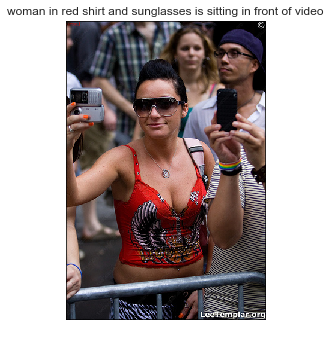

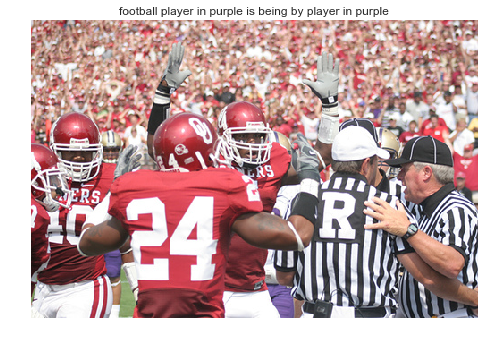

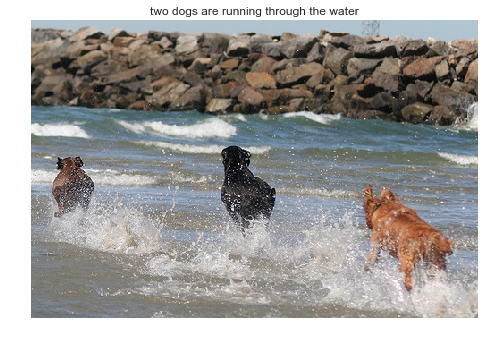

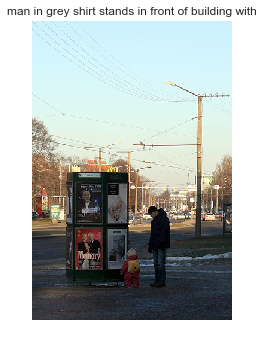

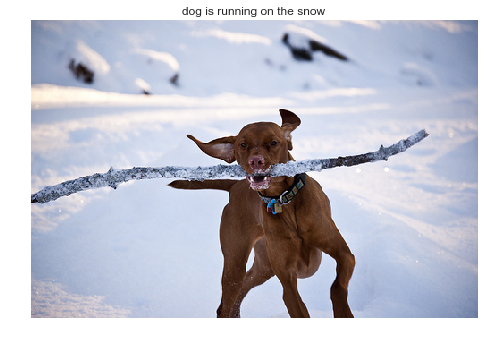

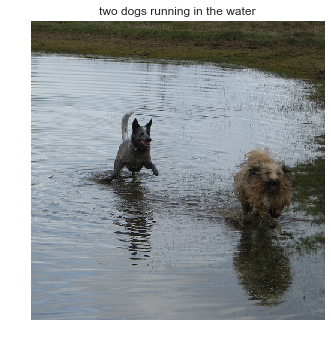

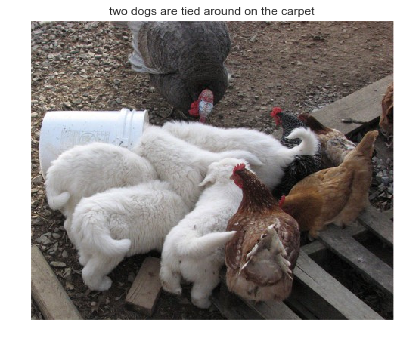

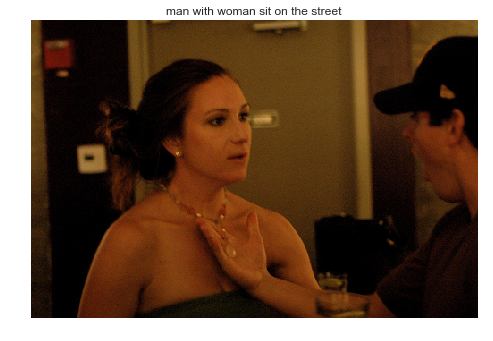

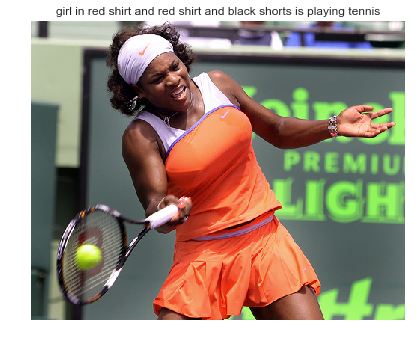

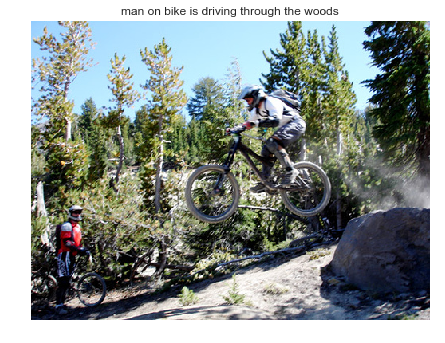

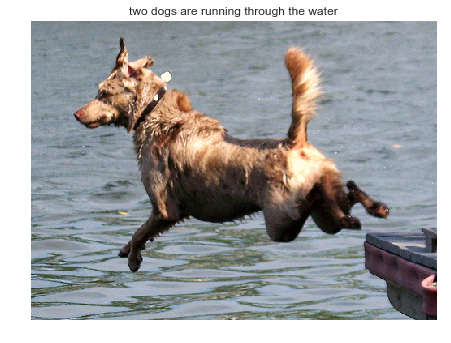

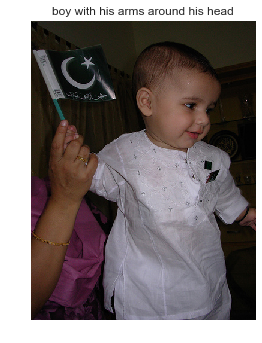

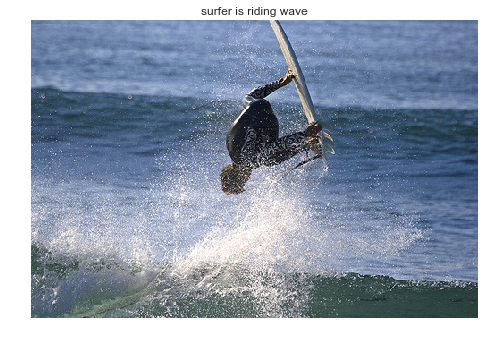

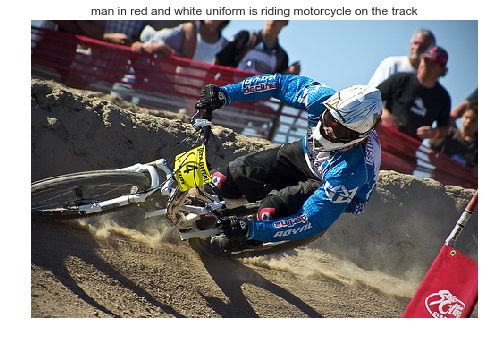

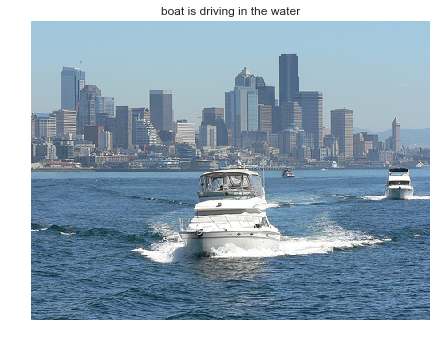

In [105]:
# Pick Some Random Images and See Results
plt.style.use("seaborn")
for i in range(15):
    idx = np.random.randint(0,1000)
    all_img_names = list(encoding_test.keys())
    img_name = all_img_names[idx]
    photo_2048 = encoding_test[img_name].reshape((1,2048))
    
    i = plt.imread("Flickr_Data/Images/"+img_name+".jpg")
    
    caption = predict_caption(photo_2048)
    #print(caption)
    
    plt.title(caption)
    plt.imshow(i)
    plt.axis("off")
    plt.show()
    